<a href="https://colab.research.google.com/github/Jyunci/DL_practice/blob/master/ch2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import mnist

In [0]:
pip list | grep tensorflow

mesh-tensorflow          0.1.9          
tensorflow               1.15.0         
tensorflow-datasets      2.0.0          
tensorflow-estimator     1.15.1         
tensorflow-gan           2.0.0          
tensorflow-hub           0.7.0          
tensorflow-metadata      0.21.1         
tensorflow-privacy       0.2.2          
tensorflow-probability   0.7.0          


In [0]:
# load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [0]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


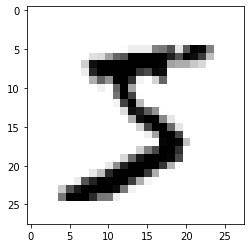

In [0]:
plt.imshow(train_images[0].reshape(28,28),cmap='binary')
plt.show()

train_L[0]: 5
Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

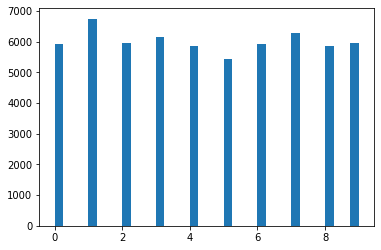

In [0]:
from collections import Counter
print('train_L[0]:',train_labels[0])
print(Counter(train_labels))
plt.hist(train_labels, bins='auto')
train_labels

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

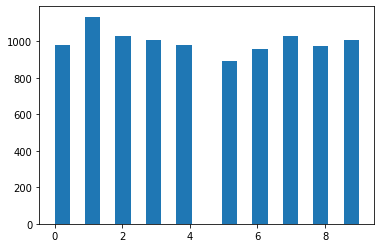

In [0]:
plt.hist(test_labels, bins='auto')
print(Counter(test_labels))
train_labels

In [0]:
np.isnan(train_labels)

array([False, False, False, ..., False, False, False])

In [0]:
np.count_nonzero(np.isnan(train_labels))

0

In [0]:
np.isnan(train_labels).sum()


0

In [0]:
np.isnan(test_labels).sum()

0

In [0]:
# build DNN model
from keras import models 
from keras import layers 
 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))

In [0]:
# DNN updating, optimiser, loss, evaluation
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# compile(optimizer, 
#         loss=None,
#         metrics=None,
#         loss_weights=None,
#         sample_weight_mode=None,
#         weighted_metrics=None,
#         target_tensors=None)

In [0]:
# Normalization
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255 
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
# transfer label into one-hot encoding type
from keras.utils import to_categorical 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
print(train_labels.shape)
train_labels[0]

(60000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
print(test_labels.shape)

(10000, 10)


In [0]:
# Training model
network.fit(train_images, train_labels, epochs=5, batch_size=128) 

Epoch 1/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.2632 - acc: 0.9238
Epoch 2/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.1071 - acc: 0.9679
Epoch 3/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.0710 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.0522 - acc: 0.9844
Epoch 5/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0393 - acc: 0.9881


In [0]:
 network.fit(train_images, train_labels, epochs=5, batch_size=128) 

Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.0292 - acc: 0.9910
Epoch 2/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.0213 - acc: 0.9936
Epoch 3/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0173 - acc: 0.9947
Epoch 4/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.0130 - acc: 0.9964
Epoch 5/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.0105 - acc: 0.9968


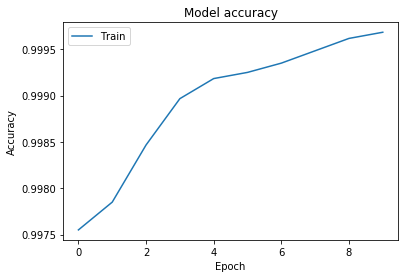

In [0]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

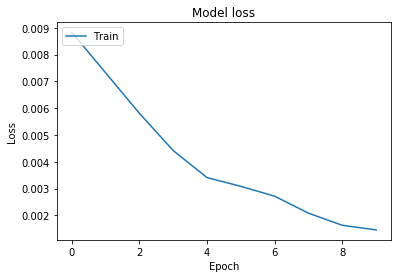

In [0]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc) 

10000/10000 [==============================] - 1s 59us/step
test_acc: 0.9821


In [0]:
predict_labels = network.predict(test_images)

In [0]:
predict_labels.shape

(10000, 10)

In [0]:
# import pandas as pd
# pd.crosstab(test_labels,predict_labels,rownames=['label'],colnames=['predict'])

In [0]:
y_true = np.argmax(test_labels, axis=1)

In [0]:
y_true

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
y_pred = np.argmax(predict_labels, axis=1)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[ 967,    1,    2,    0,    1,    2,    3,    1,    2,    1],
       [   1, 1122,    4,    1,    0,    0,    2,    3,    2,    0],
       [   2,    1, 1019,    1,    1,    0,    2,    3,    2,    1],
       [   0,    0,    7,  992,    0,    1,    0,    5,    2,    3],
       [   2,    0,    2,    0,  963,    0,    4,    4,    0,    7],
       [   2,    0,    0,    5,    0,  878,    4,    2,    0,    1],
       [   2,    2,    1,    1,    3,    2,  947,    0,    0,    0],
       [   0,    3,    7,    0,    0,    0,    0, 1012,    2,    4],
       [   1,    0,    9,    6,    2,    2,    2,    3,  946,    3],
       [   0,    3,    0,   10,    5,    5,    0,    8,    3,  975]])

In [0]:
import pandas as pd
pd.crosstab(y_true, y_pred,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,967,1,2,0,1,2,3,1,2,1
1,1,1122,4,1,0,0,2,3,2,0
2,2,1,1019,1,1,0,2,3,2,1
3,0,0,7,992,0,1,0,5,2,3
4,2,0,2,0,963,0,4,4,0,7
5,2,0,0,5,0,878,4,2,0,1
6,2,2,1,1,3,2,947,0,0,0
7,0,3,7,0,0,0,0,1012,2,4
8,1,0,9,6,2,2,2,3,946,3
